In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans


In [2]:
data = pd.read_json('webpage/films.json')
# X = np.array(data['plot', 'genres'].copy()) #use cosine similarity on film plot

X = np.array(data['plot']) #use cosine similarity on film plot
model = SentenceTransformer('distilbert-base-nli-mean-tokens') #analyse each film plot in dataset
embeddings = model.encode(X, show_progress_bar=True) #RESEARCH
cos_sim_data = pd.DataFrame(cosine_similarity(embeddings)) #RESEARCH
cos_sim_data # plot films(index) by similarity


Batches:   0%|          | 0/1784 [00:00<?, ?it/s]

,0,1,2,3,4,5,6,7,8,9,...,57051,57052,57053,57054,57055,57056,57057,57058,57059,57060
0,1.000000,0.549985,0.470084,0.593523,0.685091,0.666328,0.702951,0.539979,0.712889,0.720500,...,0.547373,0.577525,0.598714,0.590086,0.638559,0.726925,0.677061,0.693247,0.603266,0.762778
1,0.549985,1.000000,0.350558,0.488664,0.663013,0.598500,0.672464,0.618689,0.669583,0.601266,...,0.251838,0.542478,0.609751,0.623910,0.572713,0.520778,0.614591,0.594124,0.544974,0.644189
2,0.470084,0.350558,1.000000,0.397711,0.537982,0.566246,0.512457,0.595904,0.520379,0.616584,...,0.469369,0.650599,0.526969,0.647222,0.555311,0.412059,0.502397,0.598745,0.660899,0.641090
3,0.593523,0.488664,0.397711,1.000000,0.661252,0.706641,0.535707,0.585068,0.544549,0.618842,...,0.498599,0.389869,0.602636,0.527618,0.655896,0.687126,0.637481,0.548368,0.520876,0.660371
4,0.685091,0.663013,0.537982,0.661252,1.000000,0.811315,0.728506,0.643923,0.761829,0.767817,...,0.530833,0.708882,0.661617,0.721779,0.670682,0.699165,0.814708,0.691721,0.661330,0.794485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57056,0.726925,0.520778,0.412059,0.687126,0.699165,0.657804,0.681993,0.561082,0.739722,0.717908,...,0.514164,0.542709,0.611301,0.544345,0.627199,1.000000,0.706144,0.686602,0.574824,0.718031
57057,0.677061,0.614591,0.502397,0.637481,0.814708,0.702162,0.682823,0.612467,0.700147,0.759781,...,0.586009,0.664898,0.646985,0.636962,0.624362,0.706144,1.000000,0.607448,0.591359,0.768061
57058,0.693247,0.594124,0.598745,0.548368,0.691721,0.698280,0.747572,0.670936,0.784969,0.724065,...,0.524588,0.697298,0.756063,0.719696,0.661806,0.686602,0.607448,1.000000,0.791772,0.794522
57059,0.603266,0.544974,0.660899,0.520876,0.661330,0.718291,0.656975,0.693113,0.670968,0.680400,...,0.393001,0.666621,0.767642,0.720000,0.623804,0.574824,0.591359,0.791772,1.000000,0.677876


In [3]:
def get_film_index(film_name):
    try:
        index = data[data['primaryTitle'] == film_name].index[0]
        return index
    except IndexError:
        print(f"Film '{film_name}' not found")
        return None

def give_recommendations(index):

  index_recomm =cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:10] #get index of similar films
  movies_recomm =  data['primaryTitle'].loc[index_recomm].values #get names of similar films
  result = {'Movies':movies_recomm,'Index':index_recomm} #dictionary of film name to index

  print('movie: %s'%(data['primaryTitle'].loc[index]))
  print('plot: %s'%(data['plot'].loc[index]))
  print('genres: %s'%(data['genres'].loc[index]))
  print('')

  # Print the plot and genres of each recommended movie
  k = 1
  for movie_index in index_recomm:
    similarity = cos_sim_data.loc[index, movie_index] * 100
    movie = data['primaryTitle'].loc[movie_index]
    plot_q = data['plot'].loc[movie_index]
    genre_q = data['genres'].loc[movie_index]

    print('%i: %s (%.1f%%)' % (k, movie, similarity))
    print('Plot: %s ' % plot_q)
    print('Genre: %s',,% genre_q)
    print('')

    k += 1

  return result


give_recommendations(get_film_index('Blade Runner'))

movie: Blade Runner
plot: In the smog-choked dystopian Los Angeles of 2019, blade runner Rick Deckard is called out of retirement to terminate a quartet of replicants who have escaped to Earth seeking their creator for a way to extend their short life spans.
genres: Action,Drama,Sci-Fi

1: King Arthur and the Knights of the Round Table (87.9%)
Plot: In medieval England, Merlin and King Arthur banish the evil enchantress Morgana and her son Mordred to the ends of the universe as Morgana vows revenge. In present day, Knights descendant Penn doesn't take much stock in the legends of his supposed ancestors, even as the descendants meet in Thailand to practice fighting. But when Morgana and her son return to earth, armed with alien technology and hell-bent on destroying every last descendant of King Arthur and his knights, Penn must to come to terms with who he was born to be, and bring together the new Knights of the Round Table to save themselves and the earth from Morgana's total vengean

{'Movies': array(['King Arthur and the Knights of the Round Table', 'Planzet',
        "Mortal Kombat Legends: Scorpion's Revenge", 'Little Nicky',
        'Samurai Resurrection', 'Brain of Blood', 'Neon Lights',
        'BraveStorm', 'The Last: Naruto the Movie'], dtype=object),
 'Index': [46752, 20968, 13646, 51337, 34708, 115, 55144, 9859, 32797]}

In [9]:
# Assuming you have a list of liked films
liked_films = ['Blade Runner', 'The Godfather', 'Little Nicky']

# Step 2: Retrieve plot data for liked films
liked_plots = data[data['primaryTitle'].isin(liked_films)]['plot']

# Step 3: Combine plot data
combined_plots = ' '.join(liked_plots)

# Step 4: Encode plot data
liked_embeddings = model.encode([combined_plots], show_progress_bar=True)

# Step 5: Calculate similarity
cos_similarities = cosine_similarity(liked_embeddings, embeddings)

# Step 6: Sort and recommend
top_indices = cos_similarities.argsort()[0][::-1][:10]  # Top 10 recommendations
recommended_films = data.iloc[top_indices]['primaryTitle'].values

print(recommended_films)
print("Recommended films based on liked plots:")
for film in recommended_films:

    print(film)
    print('')


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

['The Godfather' 'The Watcher' 'Beautiful Blue Eyes' 'Blade Runner'
 'A Mob Story' 'Beneath the Leaves' "J.D.'s Revenge" 'Beg' 'Kabzaa'
 'The Crow: City of Angels']
Recommended films based on liked plots:
The Godfather

The Watcher

Beautiful Blue Eyes

Blade Runner

A Mob Story

Beneath the Leaves

J.D.'s Revenge

Beg

Kabzaa

The Crow: City of Angels



Text(0, 0.5, 'Counts')

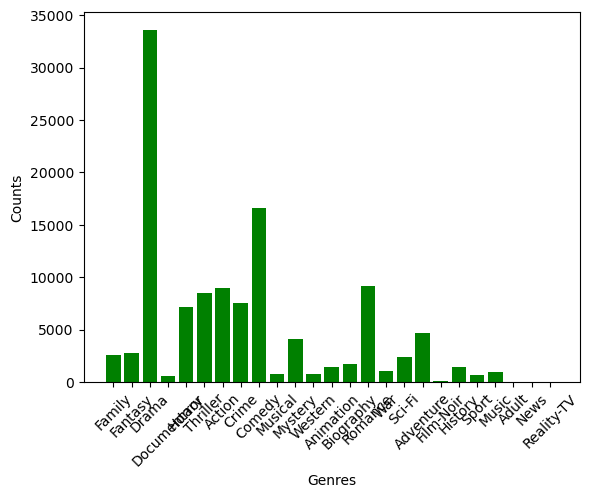

In [3]:
counts = dict()
for i in range(len(data)):
   for g in data.loc[i,'genres'].split(','):
      if g not in counts:
         counts[g] = 1
      else:
         counts[g] = counts[g] + 1
# create a bar chart
plt.bar(list(counts.keys()), counts.values(), color='g')
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('Counts')

In [92]:
###K-MEANS EXPERIMENTING

# Example preprocessing for genres (you may need to adjust this based on your data):
Y = data['genres'].copy().apply(lambda x: ' '.join(x.split(',')))
vectorizer = CountVectorizer()
Y_genres = vectorizer.fit_transform(Y)

# Perform K-Means clustering
num_clusters = 10  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=10, random_state=42)
predictions = kmeans.fit_predict(Y_genres)

clusters = data.copy()
plt.scatter(clusters['primaryTitle'],clusters['genres'],c=predictions,cmap='rainbow')


# predictions is the cluster predictions from K-Means
def get_film_index(film_name):
    try:
        index = data[data['primaryTitle'] == film_name].index[0]
        return index
    except IndexError:
        print(f"Film '{film_name}' not found")
        return None

def get_cluster_label(film_name):
    try:
        # Get the index of the film
        index = data[data['primaryTitle'] == film_name].index[0]

        # Get the cluster label for the film
        cluster_label = predictions[index]

        return cluster_label

    except IndexError:
        print(f"Film '{film_name}' not found")
        return None
    

def recommend_from_kmeans_cluster(film_name, num_recommendations=10):
    try:

        x = get_film_index(film_name)
        print('movie: %s'%(data['primaryTitle'].loc[x]))
        print('plot: %s'%(data['plot'].loc[x]))
        print('genres: %s'%(data['genres'].loc[x]))
        print('')


        cluster_label = get_cluster_label(film_name)

        # Find the indices of films in the specified cluster
        cluster_indices = data[predictions == cluster_label].index.tolist()

        # Use pairwise_distances_argmin_min to find the most similar films in the cluster
        #closest_indices = pairwise_distances_argmin_min(Y_genres[cluster_label], Y_genres[cluster_indices])

        distances = pairwise_distances(Y_genres[cluster_label], Y_genres[cluster_indices])
                
        sorted_indices = distances.argsort()
        
        # Get recommended film names and indices
        recommended_indices = [cluster_indices[i] for i in sorted_indices[0][:num_recommendations]]

        recommended_films = data['primaryTitle'].loc[recommended_indices].values

        return recommended_films

    except IndexError:
        print(f"Cluster '{cluster_label}' not found")
        return None

# Example usage:
kmeans_recommendations = recommend_from_kmeans_cluster('The Hannas')
print
print(kmeans_recommendations)


movie: The Hannas
plot: Hans and Anna – together they make the Hannas: A hefty couple who love to cook. They meet sisters Kim and Nicola, both anorexic and excitingly different. Opposites attract, however, and anything goes, so the Hannas each wind up having an affair without the other’s knowledge. But Kim and Nicola have a secret of their own in store.
genres: Comedy,Drama

[0 1 0 ... 1 2 4]
[6, 37670, 37672, 37678, 37679, 37688, 37690, 37693, 37695, 37697]

[6, 16, 18, 19, 26, 27, 28, 29, 39, 42, 44, 46, 54, 58, 65, 68, 69, 74, 77, 78, 85, 93, 108, 112, 113, 118, 119, 121, 128, 130, 131, 134, 135, 136, 139, 150, 151, 154, 156, 158, 162, 169, 183, 189, 193, 194, 197, 202, 206, 212, 217, 222, 223, 224, 225, 227, 229, 237, 240, 241, 248, 253, 262, 274, 277, 288, 290, 296, 298, 307, 310, 317, 320, 321, 327, 331, 332, 338, 340, 342, 343, 345, 348, 352, 355, 356, 365, 366, 368, 374, 376, 378, 383, 388, 393, 395, 398, 402, 408, 425, 426, 430, 433, 452, 456, 457, 458, 460, 465, 468, 470, 476